In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = r"C:\Users\shrie\Downloads\train.csv"
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check for missing values
print(titanic.isnull().sum())
# Fill missing 'Age' values with the median age
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
# Fill missing 'Embarked' values with the mode
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
# Drop the 'Cabin' column if it exists
if 'Cabin' in titanic.columns:
    titanic = titanic.drop(columns='Cabin')
# Convert 'Sex' to numerical values
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
# Verify cleaning
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


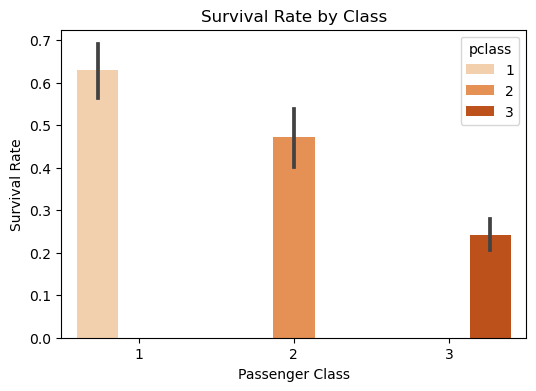

In [3]:
titanic = sns.load_dataset('titanic')

plt.figure(figsize=(6, 4))
sns.barplot(x='pclass', y='survived', hue='pclass', data=titanic, palette='Oranges',)
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

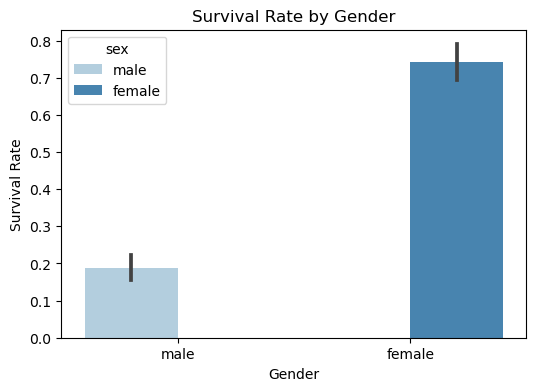

In [4]:
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', hue='sex', data=titanic, palette='Blues')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

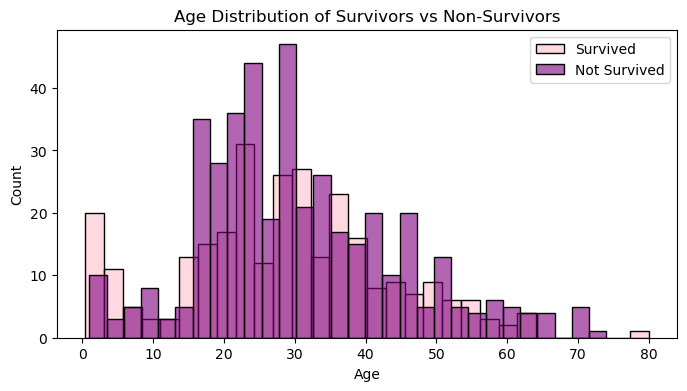

In [5]:
titanic = sns.load_dataset('titanic')
plt.figure(figsize=(8, 4))
# Plot histogram for survivors
sns.histplot(titanic[titanic['survived'] == 1]['age'], bins=30, kde=False, color='pink', label='Survived', alpha=0.6)
# Plot histogram for non-survivors
sns.histplot(titanic[titanic['survived'] == 0]['age'], bins=30, kde=False, color='purple', label='Not Survived', alpha=0.6)
plt.legend()
# Add titles and labels
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
# Display the plot
plt.show()

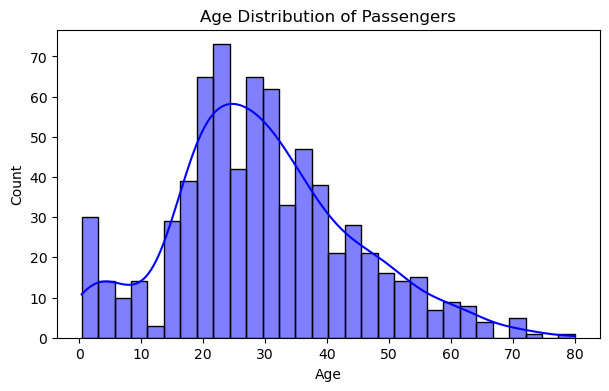

In [6]:
titanic = sns.load_dataset('titanic')
# Set up the matplotlib figure
plt.figure(figsize=(7, 4))
# Plot histogram for age distribution with KDE
sns.histplot(titanic['age'], bins=30, kde=True, color='blue')
# Add titles and labels
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

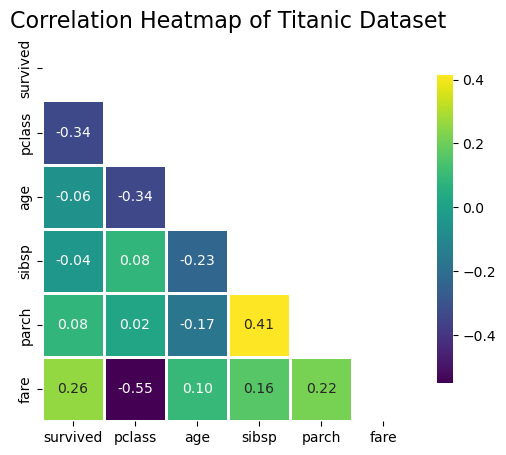

In [7]:
titanic = sns.load_dataset('titanic')
# Select only numeric columns
titanic_numeric = titanic.select_dtypes(include=['int64', 'float64'])
# Fill missing values with the median
titanic_numeric.fillna(titanic_numeric.median(), inplace=True)
# Calculate the correlation matrix
correlation_matrix = titanic_numeric.corr()
# Set up the matplotlib figure
plt.figure(figsize=(6, 5))
# Draw the heatmap with a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='viridis', fmt=".2f", linewidths=1, linecolor='white', cbar_kws={"shrink": 0.8})
# Add a title and display the plot
plt.title('Correlation Heatmap of Titanic Dataset', fontsize=16)
plt.show()